# NIFTY50 Index SIP Analysis

<font color='red'> Important Note! The stock data used in this study is obtained using free data source. As such the stock prices are not adjusted for stock splits and dividends. This will result in incorrect results. If adjusted closed prices are obtained, the same pipeline presented below can be used with correct data. </font>

## Imports

In [1]:
import numpy as np
import pandas as pd

import datetime
from datetime import date, timedelta

from nsepy import get_history

import seaborn as sns
import matplotlib.pyplot as plt

import os

import scipy.stats as stats

%matplotlib inline

# Stock wise correlation

In [2]:
start_date = pd.to_datetime('2000-01-01')

#ending date for stock price fetching
end_date = pd.to_datetime('2020-03-20')

In [3]:
stock_price_dataframe = pd.read_csv("NIFTYBEES.BO.csv")

In [4]:
stock_price_dataframe.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-02-05,486.000000,545.000000,478.000000,513.450012,513.450012,1112.0
1,2010-02-06,NaN,NaN,NaN,NaN,NaN,NaN
2,2010-02-08,475.149994,485.000000,475.049988,482.049988,482.049988,700.0
3,2010-02-09,489.950012,490.000000,481.000000,485.799988,485.799988,141.0
4,2010-02-10,489.850006,489.850006,478.149994,480.649994,480.649994,249.0


In [5]:
stock_price_dataframe.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2497,2020-03-16,NaN,NaN,NaN,NaN,NaN,NaN
2498,2020-03-17,NaN,NaN,NaN,NaN,NaN,NaN
2499,2020-03-18,NaN,NaN,NaN,NaN,NaN,NaN
2500,2020-03-19,NaN,NaN,NaN,NaN,NaN,NaN
2501,2020-03-20,90.110001,94.699997,88.099998,93.080002,93.080002,204441.0


In [11]:
stock_price_dataframe.set_index(stock_price_dataframe['Date'], inplace=True)

In [12]:
stock_price_dataframe.head()

,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2010-02-05,2010-02-05,486.000000,545.000000,478.000000,513.450012,513.450012,1112.0
2010-02-06,2010-02-06,NaN,NaN,NaN,NaN,NaN,NaN
2010-02-08,2010-02-08,475.149994,485.000000,475.049988,482.049988,482.049988,700.0
2010-02-09,2010-02-09,489.950012,490.000000,481.000000,485.799988,485.799988,141.0
2010-02-10,2010-02-10,489.850006,489.850006,478.149994,480.649994,480.649994,249.0


In [13]:
stock_price_dataframe.dropna(inplace=True)

In [14]:
portfolio_close_price_normalized = stock_price_dataframe.copy()

In [15]:
portfolio_close_price_normalized.head()

,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2010-02-05,2010-02-05,486.000000,545.000000,478.000000,513.450012,513.450012,1112.0
2010-02-08,2010-02-08,475.149994,485.000000,475.049988,482.049988,482.049988,700.0
2010-02-09,2010-02-09,489.950012,490.000000,481.000000,485.799988,485.799988,141.0
2010-02-10,2010-02-10,489.850006,489.850006,478.149994,480.649994,480.649994,249.0
2010-02-11,2010-02-11,482.500000,490.000000,481.950012,485.000000,485.000000,115.0


In [16]:
portfolio_close_price_normalized['Adj Close'] = stock_price_dataframe['Adj Close']/stock_price_dataframe.iloc[0]['Adj Close']

In [17]:
portfolio_close_price_normalized.head()

,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2010-02-05,2010-02-05,486.000000,545.000000,478.000000,513.450012,1.000000,1112.0
2010-02-08,2010-02-08,475.149994,485.000000,475.049988,482.049988,0.938845,700.0
2010-02-09,2010-02-09,489.950012,490.000000,481.000000,485.799988,0.946149,141.0
2010-02-10,2010-02-10,489.850006,489.850006,478.149994,480.649994,0.936118,249.0
2010-02-11,2010-02-11,482.500000,490.000000,481.950012,485.000000,0.944590,115.0


In [18]:
portfolio_size = 10000

In [19]:
portfolio_normalized_allocation = portfolio_close_price_normalized.copy()

In [20]:
portfolio_normalized_allocation['Adj Close'] = portfolio_close_price_normalized['Adj Close'].apply(lambda normalized_return : normalized_return * portfolio_size)

In [21]:
portfolio_normalized_allocation.head()

,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2010-02-05,2010-02-05,486.000000,545.000000,478.000000,513.450012,10000.000000,1112.0
2010-02-08,2010-02-08,475.149994,485.000000,475.049988,482.049988,9388.450224,700.0
2010-02-09,2010-02-09,489.950012,490.000000,481.000000,485.799988,9461.485571,141.0
2010-02-10,2010-02-10,489.850006,489.850006,478.149994,480.649994,9361.183811,249.0
2010-02-11,2010-02-11,482.500000,490.000000,481.950012,485.000000,9445.904931,115.0


In [22]:
portfolio_normalized_allocation.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2020-03-06,2020-03-06,117.919998,117.919998,116.000000,117.260002,2283.766662,77309.0
2020-03-11,2020-03-11,111.570000,112.110001,110.500000,111.389999,2169.441940,75424.0
2020-03-12,2020-03-12,107.639999,107.709999,101.169998,103.059998,2007.206069,287722.0
2020-03-13,2020-03-13,100.000000,108.239998,96.500000,106.019997,2064.855283,178587.0
2020-03-20,2020-03-20,90.110001,94.699997,88.099998,93.080002,1812.834742,204441.0


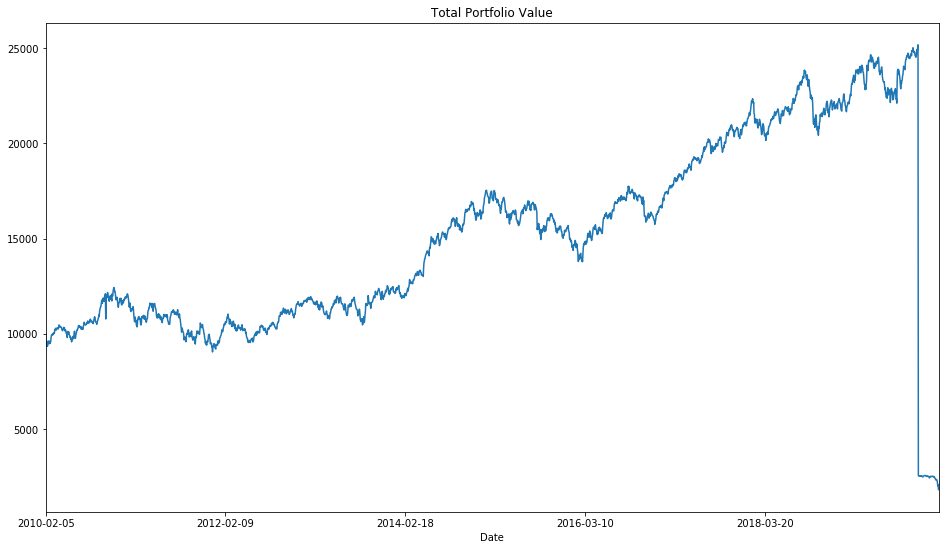

In [23]:
portfolio_normalized_allocation['Adj Close'].plot(figsize=(16,9))

plt.title('Total Portfolio Value');

## Disclaimer

GNU General Public License v3.0

THIS SOFTWARE IS PROVIDED BY THE COPYRIGHT HOLDERS AND CONTRIBUTORS "AS IS" AND ANY EXPRESS OR IMPLIED WARRANTIES, INCLUDING, BUT NOT LIMITED TO, THE IMPLIED WARRANTIES OF MERCHANTABILITY AND FITNESS FOR A PARTICULAR PURPOSE ARE DISCLAIMED. IN NO EVENT SHALL THE COPYRIGHT HOLDER OR CONTRIBUTORS BE LIABLE FOR ANY DIRECT, INDIRECT, INCIDENTAL, SPECIAL, EXEMPLARY, OR CONSEQUENTIAL DAMAGES (INCLUDING, BUT NOT LIMITED TO, PROCUREMENT OF SUBSTITUTE GOODS OR SERVICES; LOSS OF USE, DATA, OR PROFITS; OR BUSINESS INTERRUPTION) HOWEVER CAUSED AND ON ANY THEORY OF LIABILITY, WHETHER IN CONTRACT, STRICT LIABILITY, OR TORT (INCLUDING NEGLIGENCE OR OTHERWISE) ARISING IN ANY WAY OUT OF THE USE OF THIS SOFTWARE, EVEN IF ADVISED OF THE POSSIBILITY OF SUCH DAMAGE.